In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

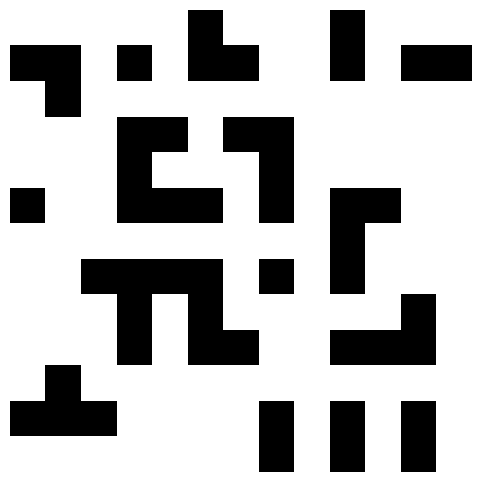

In [295]:
import random
import numpy as np
import matplotlib.pyplot as plt




def prim_maze(size = 13, p = 0.3):
    """Generate a maze using Prim's algorithm."""
    grid = np.ones((size, size), dtype=int)
    
    # Start with a random cell
    start_x, start_y = random.randrange(0, size, 2), random.randrange(0, size, 2)
    grid[start_x, start_y] = 0  # Mark it as a passage
    
    # Initialize the frontiers list
    frontiers = set()
    for dx, dy in [(-2, 0), (2, 0), (0, -2), (0, 2)]:
        nx, ny = start_x + dx, start_y + dy
        if 0 <= nx < size and 0 <= ny < size and grid[nx, ny] == 1:
            frontiers.add((nx, ny, start_x, start_y))
    
    while frontiers:
        # Randomly choose a frontier cell
        fx, fy, px, py = random.choice(list(frontiers))
        frontiers.remove((fx, fy, px, py))
        
        # Make the frontier cell a passage
        if grid[fx, fy] == 1:
            grid[fx, fy] = 0
            # Connect it to the adjacent cell
            grid[(fx + px) // 2, (fy + py) // 2] = 0

            # Add frontiers of this cell
            for dx, dy in [(-2, 0), (2, 0), (0, -2), (0, 2)]:
                nx, ny = fx + dx, fy + dy
                if 0 <= nx < size and 0 <= ny < size and grid[nx, ny] == 1:
                    frontiers.add((nx, ny, fx, fy))
    
    for x in range(1, size - 1):
        for y in range(1, size - 1):
            if grid[x, y] == 1 and random.random() < p:
                grid[x, y] = 0
    return grid



def display_maze(grid):
    """Display the maze."""
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="binary")
    plt.axis("off")
    plt.show()

# Generate a 13x13 maze using Prim's algorithm and remove walls with p=0.3
size = 13
maze = prim_maze(size)
display_maze(maze)



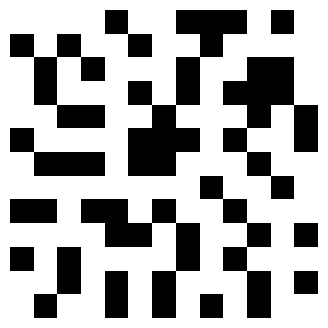

In [205]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
maze_size = 13  # 13x13 maze
wall_remove_prob = 0.0  # Probability of removing walls

# Initialize maze grid with walls (1 = wall, 0 = passage)
maze = np.ones((maze_size, maze_size), dtype=int)

# Prim's algorithm implementation to generate a maze
def generate_maze():
    # Random starting point
    start_x, start_y = random.randint(0, maze_size - 1), random.randint(0, maze_size - 1)
    maze[start_x, start_y] = 0  # Mark starting cell as a passage

    # Track the walls around the passages
    walls = [(start_x + dx, start_y + dy) for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
             if 0 <= start_x + dx < maze_size and 0 <= start_y + dy < maze_size]

    while walls:
        # Choose a random wall
        wall_x, wall_y = random.choice(walls)
        walls.remove((wall_x, wall_y))

        # Check if it connects to a new cell
        neighbors = [(wall_x + dx, wall_y + dy) for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                     if 0 <= wall_x + dx < maze_size and 0 <= wall_y + dy < maze_size]

        if sum(maze[nx, ny] == 0 for nx, ny in neighbors) == 1:
            # Make the wall a passage
            maze[wall_x, wall_y] = 0

            # Add surrounding walls of the new passage to the wall list
            for nx, ny in neighbors:
                if maze[nx, ny] == 1 and (nx, ny) not in walls:
                    walls.append((nx, ny))

# Function to remove walls randomly
def remove_walls():
    for x in range(maze_size):
        for y in range(maze_size):
            if maze[x, y] == 1 and random.random() < wall_remove_prob:
                maze[x, y] = 0  # Remove wall

# Generate maze and then remove walls randomly
generate_maze()
remove_walls()

# Visualize the maze
plt.figure(figsize=(4,4))
plt.imshow(maze, cmap="binary")
plt.axis('off')
plt.show()


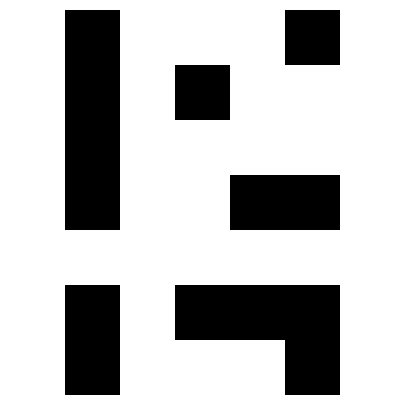

In [41]:
def initialize_maze(width, height):
    """Initialize the maze grid with all walls"""
    maze = np.ones((height, width), dtype=int)
    return maze

def add_frontier(maze, frontiers, x, y):
    """Add frontier walls of a cell to the list"""
    if x >= 2 and maze[y][x - 2] == 1:
        frontiers.append((x - 2, y, x - 1, y))
    if x < len(maze[0]) - 2 and maze[y][x + 2] == 1:
        frontiers.append((x + 2, y, x + 1, y))
    if y >= 2 and maze[y - 2][x] == 1:
        frontiers.append((x, y - 2, x, y - 1))
    if y < len(maze) - 2 and maze[y + 2][x] == 1:
        frontiers.append((x, y + 2, x, y + 1))

def generate_maze(width, height):
    """Generate maze using Prim's algorithm"""
    maze = initialize_maze(width, height)
    start_x, start_y = random.randrange(0, width, 2), random.randrange(0, height, 2)
    maze[start_y][start_x] = 0
    
    frontiers = []
    add_frontier(maze, frontiers, start_x, start_y)
    
    while frontiers:
        idx = random.randint(0, len(frontiers) - 1)
        x, y, wx, wy = frontiers.pop(idx)
        
        if maze[y][x] == 1:
            maze[y][x] = 0
            maze[wy][wx] = 0
            add_frontier(maze, frontiers, x, y)
    
    return maze

def has_adjacent_empty(maze, x, y):
    """Check if there is an adjacent empty square"""
    adjacent_positions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    for dx, dy in adjacent_positions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and maze[ny][nx] == 0:
            return True
    return False

def remove_random_walls(maze, p=0.3):
    """Remove walls randomly with probability p if adjacent to an empty square, including outer edges"""
    for y in range(len(maze)):
        for x in range(len(maze[0])):
            if maze[y][x] == 1 and has_adjacent_empty(maze, x, y) and random.random() < p:
                maze[y][x] = 0

def plot_maze(maze):
    """Plot the maze using matplotlib"""
    plt.figure(figsize=(5, 5))
    plt.imshow(maze, cmap='binary')
    plt.axis('off')
    plt.show()

# Set maze dimensions
width, height = 7, 7

# Generate the maze
maze = generate_maze(width, height)

# Randomly remove walls with probability p = 0.3, including edge walls if adjacent to an empty cell
remove_random_walls(maze, p=0.3)

# Plot the final maze
plot_maze(maze)
